## SkillCraft Technology
### Task 03

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Load Dataset

In [31]:
file_path = "Dataset\\bank+marketing\\bank\\bank.csv"   
df = pd.read_csv(file_path, sep=';')   


print(f"Data loaded: {df.shape[0]} rows, {df.shape[1]} columns")


Data loaded: 4521 rows, 17 columns


## Encode Categorical Variables

In [32]:
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


## Split Features and Target

In [33]:
X = df.drop("y", axis=1)
y = df["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Build Decision Tree Classifier

In [34]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)


## Predictions and Evaluation

In [35]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\n===== Model Evaluation =====")
print("Accuracy:", accuracy_score(y_test, y_pred))



===== Model Evaluation =====
Accuracy: 0.887292817679558


## Visualize the Decision Tree

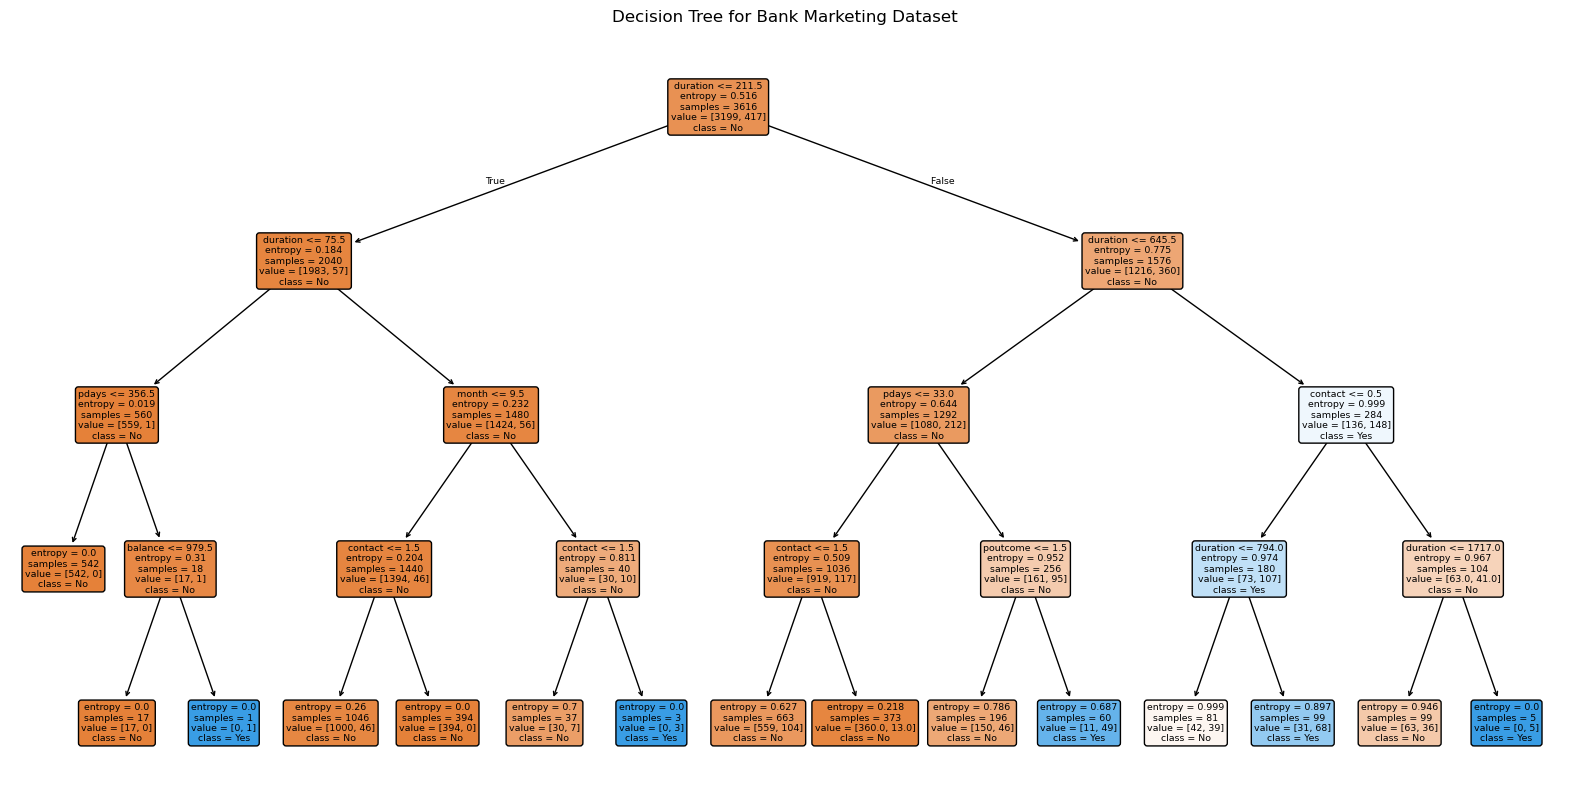

In [36]:
plt.figure(figsize=(20,10))
plot_tree(model, 
          feature_names=X.columns, 
          class_names=['No', 'Yes'], 
          filled=True, rounded=True)
plt.title("Decision Tree for Bank Marketing Dataset")
plt.show()

## Feature Importance 

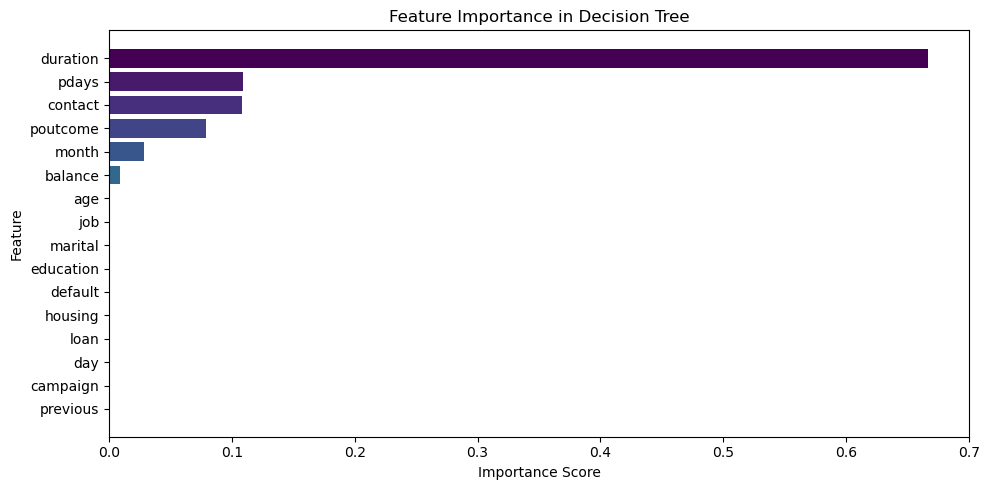


===== Top Predictive Features =====
duration    0.666714
pdays       0.108680
contact     0.107902
poutcome    0.078959
month       0.028631
dtype: float64


In [37]:
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
colors = plt.cm.viridis(np.linspace(0, 1, len(importances)))
plt.barh(importances.index, importances.values, color=colors)
plt.gca().invert_yaxis()  
plt.title("Feature Importance in Decision Tree")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

print("\n===== Top Predictive Features =====")
print(importances.head(5))